In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install pmdarima==1.8.0

     |████████████████████████████████| 1.5MB 8.8MB/s 
     |████████████████████████████████| 9.5MB 34.9MB/s 
     |████████████████████████████████| 2.1MB 42.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [4]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Gujarat1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,15,0,0,0,-4,0,0,0,0,0,0,0
131396,2014,12,31,20,0,14,0,0,0,-4,0,0,0,0,0,0,0
131397,2014,12,31,21,0,14,0,0,0,-4,0,0,0,0,0,0,0
131398,2014,12,31,22,0,13,0,0,0,-4,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(24)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0,2000-01-01 02:00:00
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128,2000-01-01 03:00:00
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337,2000-01-01 04:00:00
5,2000,1,1,5,0,26,149,731,531,-4,140,140,713,713,0,513,513,2000-01-01 05:00:00
6,2000,1,1,6,0,29,164,796,666,-6,154,154,770,770,0,640,640,2000-01-01 06:00:00
7,2000,1,1,7,0,31,171,822,734,-6,153,153,818,818,0,714,714,2000-01-01 07:00:00
8,2000,1,1,8,0,32,170,819,729,-5,184,184,748,748,0,695,695,2000-01-01 08:00:00
9,2000,1,1,9,0,32,162,786,652,-4,147,147,786,786,0,637,637,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
X.head(24)

,GHI
Date,
2000-01-01 00:00:00,0
2000-01-01 01:00:00,0
2000-01-01 02:00:00,0
2000-01-01 03:00:00,128
2000-01-01 04:00:00,337
2000-01-01 05:00:00,513
2000-01-01 06:00:00,640
2000-01-01 07:00:00,714
2000-01-01 08:00:00,695


In [8]:
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
X.head(24)

,Date,GHI
0,2000-01-01 08:00:00,695
1,2000-01-01 09:00:00,637
2,2000-01-01 10:00:00,509
3,2000-01-01 11:00:00,317
4,2000-01-01 12:00:00,103
5,2000-01-01 13:00:00,0
6,2000-01-01 14:00:00,0
7,2000-01-01 15:00:00,0
8,2000-01-01 16:00:00,0
9,2000-01-01 17:00:00,0


In [9]:
y=X.resample('D',on='Date').mean()
y

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2014-12-27,214.8
2014-12-28,217.3
2014-12-29,216.4


In [10]:
X_train=y[:'2011']
X_test=y['2012':]

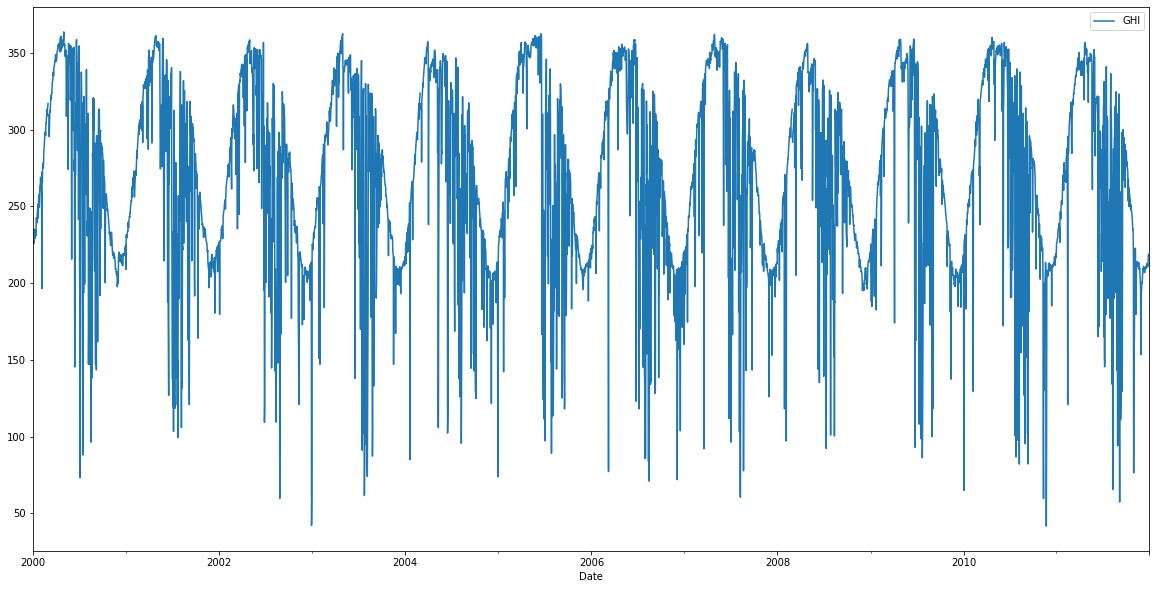

In [11]:
X_train.plot(figsize=(20,10))

In [12]:
TrainDF=pd.DataFrame(X_train)
TrainDF=TrainDF.reset_index()

In [13]:
TrainDF=TrainDF.dropna()
TrainDF=TrainDF.reset_index()

In [14]:
del TrainDF['index']
TrainDF

,Date,GHI
0,2000-01-01,226.1
1,2000-01-02,227.8
2,2000-01-03,227.9
3,2000-01-04,225.9
4,2000-01-05,228.8
...,...,...
4375,2011-12-27,215.5
4376,2011-12-28,218.6
4377,2011-12-29,218.8
4378,2011-12-30,218.8


In [15]:
TrainDF.plot(figsize=(20,10))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f918fbeedd0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [16]:
TrainDataFinal=[]
for i in range(5):
  newFoo=TrainDF[i::5]
  newFoo.set_index('Date',inplace=True)
  TrainDataFinal.append(newFoo)
TrainDataFinal

[              GHI
 Date             
 2000-01-01  226.1
 2000-01-06  235.1
 2000-01-11  234.4
 2000-01-16  239.1
 2000-01-21  242.2
 ...           ...
 2011-12-07  209.5
 2011-12-12  207.2
 2011-12-17  210.4
 2011-12-22  212.8
 2011-12-27  215.5
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-02  227.8
 2000-01-07  232.3
 2000-01-12  230.9
 2000-01-17  245.3
 2000-01-22  252.2
 ...           ...
 2011-12-08  208.1
 2011-12-13  207.0
 2011-12-18  209.5
 2011-12-23  210.7
 2011-12-28  218.6
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-03  227.9
 2000-01-08  229.1
 2000-01-13  242.2
 2000-01-18  247.7
 2000-01-23  257.5
 ...           ...
 2011-12-09  210.8
 2011-12-14  206.9
 2011-12-19  210.6
 2011-12-24  212.2
 2011-12-29  218.8
 
 [876 rows x 1 columns],               GHI
 Date             
 2000-01-04  225.9
 2000-01-09  232.9
 2000-01-14  242.5
 2000-01-19  251.3
 2000-01-24  255.9
 ...           ...
 2011-12-10  208.9
 2011-12-1

In [17]:
from pmdarima.arima import ARIMA

predictions=[]
for i in range(5):
  stepwise_model = ARIMA(order=(1,1,0),seasonal_order=(1,1,0,73))
  stepwise_model.fit(TrainDataFinal[i])
  print(stepwise_model.summary())
  pred=stepwise_model.predict(n_periods=219)
  predictions.append(pred)
predictions

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  876
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 73)   Log Likelihood               -4405.381
Date:                            Fri, 28 May 2021   AIC                           8818.763
Time:                                    15:12:49   BIC                           8837.511
Sample:                                         0   HQIC                          8825.964
                                            - 876                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0062      2.161      0.003      0.998      -4.230       4.242
ar.L1         -0.4776      0.020   

[array([226.097313  , 234.5796242 , 219.91316685, 250.91509041,
        256.73566378, 266.38518801, 278.05247099, 277.2907059 ,
        285.95355347, 285.5645674 , 308.84761608, 312.41436076,
        300.52242531, 323.66631528, 331.26852291, 338.12843663,
        343.77719038, 348.49055496, 344.93076926, 351.13132726,
        335.13262179, 352.92521909, 358.7553324 , 358.64800922,
        347.7089117 , 334.87334698, 354.25592319, 354.31124303,
        325.37592723, 346.30907551, 356.32047056, 328.22693977,
        343.88546404, 338.65687499, 321.1343664 , 304.7134098 ,
        272.7443493 , 258.16935681, 203.05885019, 333.11383115,
        313.37169864, 213.11929607, 304.6047588 , 224.25159901,
        258.08493769, 286.55823951, 315.0065732 , 280.8921844 ,
        182.6341407 , 270.40429659, 262.47440447, 216.32907802,
        275.10745415, 292.37870615, 273.66383001, 284.34739139,
        277.54466568, 240.48405336, 257.04972273, 250.35783388,
        235.22366221, 198.04302859, 227.

In [18]:
results=[]
for j in range(len(predictions[0])):
  for i in range(5):
    results.append(predictions[i][j])
results

[226.0973130013257,
 152.06821997295214,
 226.35826025472247,
 228.95063470487923,
 227.0805085315193,
 234.57962420284161,
 234.93273800342286,
 233.6371140558413,
 213.1515846151685,
 210.15012816356185,
 219.9131668463336,
 235.7040285829203,
 239.2169837148368,
 233.86223630516972,
 240.64965125122654,
 250.9150904068243,
 247.18035477152435,
 245.35228119550925,
 251.63490647482024,
 250.496833075281,
 256.7356637758592,
 254.55278545794474,
 253.79864208864018,
 253.91179480368788,
 260.51513090672864,
 266.38518800862124,
 268.96374395278497,
 265.3523469548327,
 261.9347609929947,
 268.50031315138835,
 278.0524709898444,
 271.06467414668356,
 269.55376417418825,
 272.08083660369147,
 270.04838181782947,
 277.29070589653224,
 274.37692515531126,
 265.8346716000754,
 201.7699475863568,
 278.63636069001456,
 285.95355347197926,
 285.4235585227215,
 286.4875134867082,
 266.35377333908104,
 197.31443330907675,
 285.5645674015654,
 296.5445588454323,
 287.6925770393261,
 294.00543496

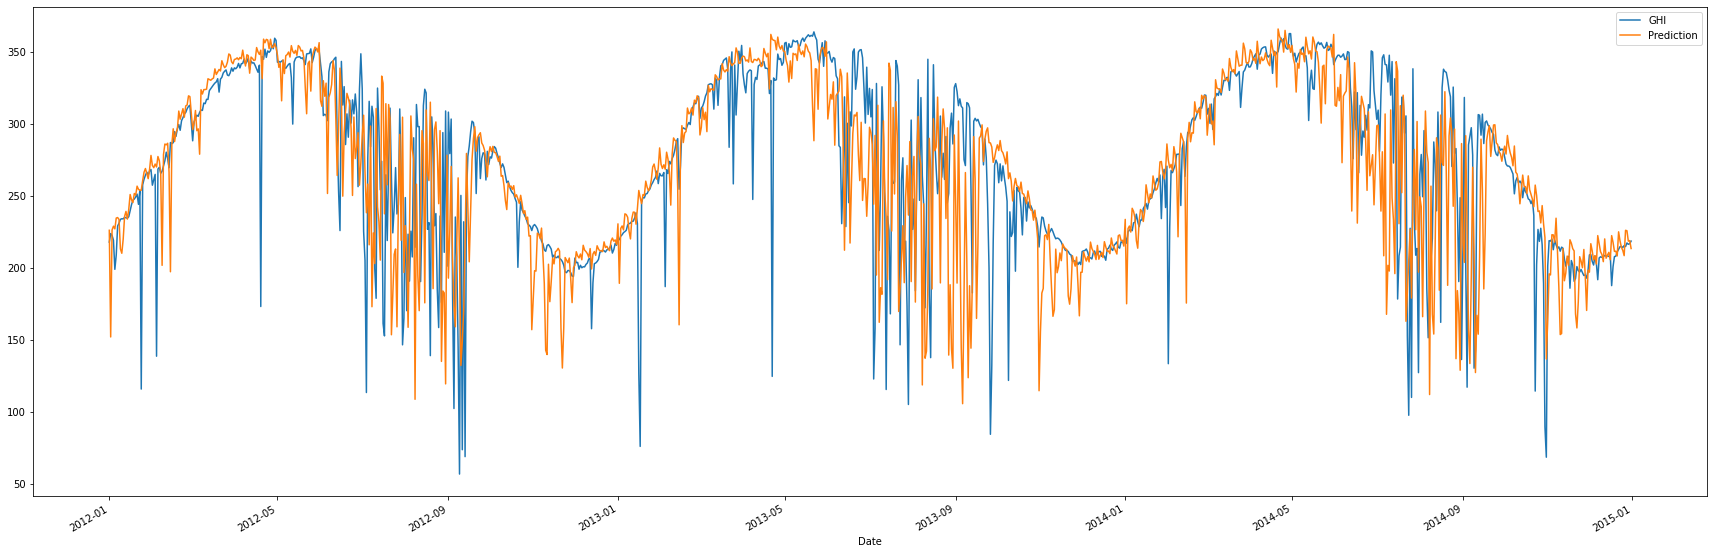

In [19]:
X_test=X_test.dropna()
Finalresults = pd.DataFrame(results,index = X_test[:1095].index,columns=['Prediction'])
pd.concat([X_test[:1095],Finalresults],axis=1).plot(figsize=(30,10))

In [ ]:
len(results)

1095

In [ ]:
Finalresults

,Prediction
Date,
2012-01-01,561.833762
2012-01-02,563.852391
2012-01-03,560.782831
2012-01-04,353.498675
2012-01-05,412.288085
...,...
2014-12-27,599.700574
2014-12-28,649.486240
2014-12-29,664.690736


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test[:1095],Finalresults ,squared=False)

48.34106810702238

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,Finalresults)

0.128484876988801

In [20]:
Finalresults.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/SARIMAdaily.csv')